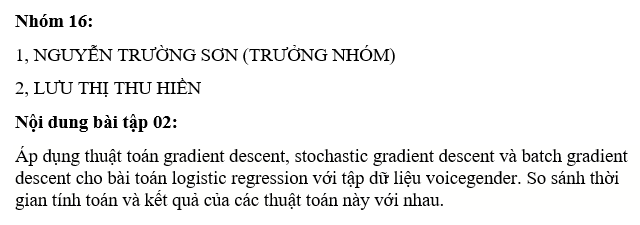



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! pip install -q scikit-plot
import scikitplot as skplt
from sklearn.metrics import roc_curve, classification_report
import time

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


NOTED:

1)Tần số (FREQ) cơ bản của giọng nam thay đổi từ 80 Hz đến 250 Hz, trong khi đó giọng nữ là 120 Hz đến 400 Hz.

2) Fundamental freq: 
- The average fundamental frequency for a male voice is 125Hz; for a female voice it’s 200Hz 

In [5]:
#Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

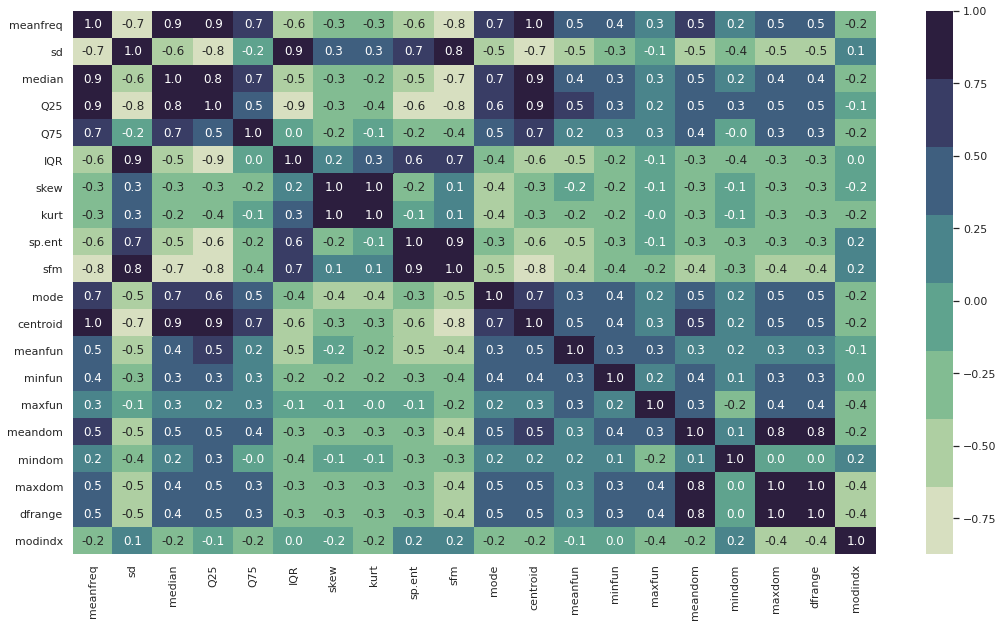

In [6]:
#Correlation
fig = plt.gcf()
fig.set_size_inches(18, 10)

sns.set()
sns.heatmap(data.corr(), annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [7]:
data.label[data.label == 'male'] = 1
data.label[data.label == 'female'] = 0
x = data.drop(columns='label')
y = data["label"]
y=y.astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaled_x = scaler.fit_transform(x)

In [10]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, random_state=42)
new_x = pca.fit_transform(scaled_x)

In [11]:
scaled_x.shape

(3168, 20)

In [12]:
new_x.shape

(3168, 10)

In [13]:
#Spilt data to train/test spilt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.25, random_state=42)

**BUILD MODEL BẰNG THƯ VIỆN**

In [14]:
#Build logistic model
import time
start_time_library = time.time()
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)
end_time_library = time.time() - start_time_library
label_predicted_library = model.predict(x_test)

In [15]:
#Model Evaluating
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
#AUC
auc_library = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(label_predicted_library))
auc_library

0.9756018592723195

**TỰ XÂY DỰNG MODEL BẰNG 3 PHƯƠNG PHÁP**

**Hàm Sigmoid**

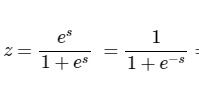!

**Trong đó: score (s)**

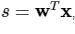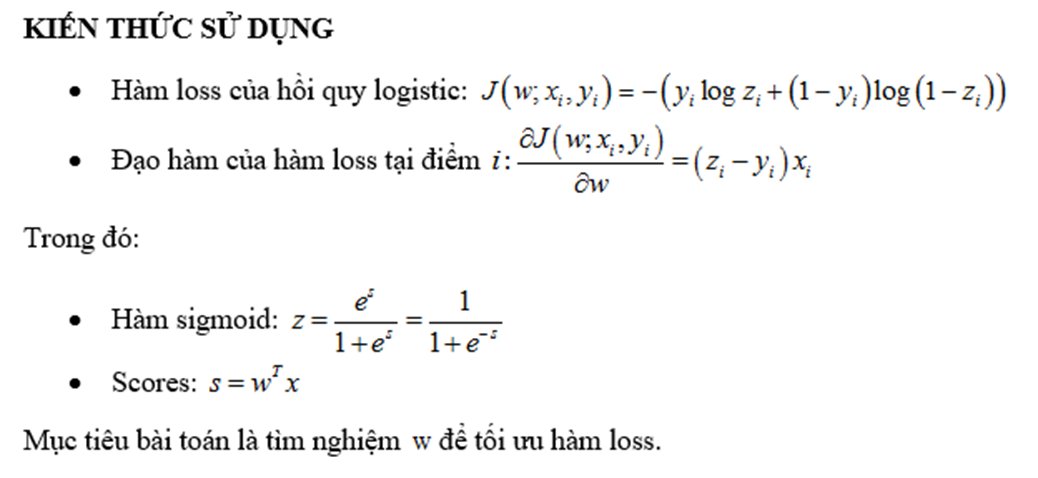

**PP1: GRADIENT DESCENT**

In [17]:
def sigmoid(scores): 
   return 1 / (1 + np.exp(-scores))

In [18]:
def log_likelihood(features, target, weights): 
   scores = np.dot(features, weights)  
   ll = np.sum(target * scores - np.log(1 + np.exp(scores)))  
   return ll

In [19]:
def cost_function(target, prediction): 
   N = target.shape[0]
  
   return -1/N * np.sum(np.dot(target,np.log(prediction)) + np.dot((1-target), np.log(1-prediction)))

In [20]:
def logistic_regression_gd(features, target, num_steps, learning_rate, tol):
    import time 
    intercept = np.ones((features.shape[0], 1))  
    features = np.hstack((intercept, features))  #x: feature  
    #Khởi tạo nghiệm của bài toán = 0
    w_init = np.zeros(features.shape[1])  #w: weights
    #Khởi tạo biến start_time  = currenttime để tính thời gian chạy 
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [step]  
    w_list = [w_init]
    for step in range(num_steps):  
      #Tính score(s)
      scores = np.dot(features, w_list[-1]) 
      #Tính z (hàm sigmoid)
      predictions = sigmoid(scores)  
      #Tính (z-y)
      output_error_signal = -target + predictions      
      # Tính đạo hàm:
      gradient = np.dot(features.T, output_error_signal)    
      # Cập nhật nghiệm theo pp gradient descent
      w = w_list[-1] - learning_rate * gradient
      step += 1
      total_step.append(step)  
      w_list.append(w)
      #Stop condition
      if (np.abs(learning_rate*gradient)< tol).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            return w_list[-1],total_step,total_time,w_list
      end_time = time.time()
      total_time.append(end_time-start_time)   
    return w_list[-1],total_step,total_time,w_list

In [21]:
result_gd= logistic_regression_gd(x_train, y_train,  num_steps = 100000, learning_rate=  0.0001, tol = 1e-4)

**PP2: STOCHASTIC GRADIENT DESCENT**

In [22]:
def stochastic_logistic_regression(features, target, num_steps, learning_rate,tol):
    import time 
    #Tổng số quan sát trong tập train:
    N = features.shape[0]
    #Khởi tạo nghiệm của bài toán = 0
    w_init = np.zeros(shape = (x_train.shape[1] + 1) ) 
    #Khởi tạo biến start_time  = currenttime để tính thời gian chạy 
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [step]
    w_list = [w_init]
    for m in range(num_steps):  
        mix_id = np.random.permutation(N-1) 
        for i in mix_id:    
          xi = np.hstack([[1], features[i] ])
          yi = np.array(target)[i]
          #Tính score(s)
          scores = np.dot(w_list[-1], xi) 
          #Tính z (hàm sigmoid)
          predictions = sigmoid(scores)  
          #Tính (z-y)
          output_error_signal = -yi + predictions      
          # Tính đạo hàm:
          gradient =  np.dot(output_error_signal , xi) 
          # Cập nhật nghiệm theo pp gradient descent
          w = w_list[-1] - learning_rate * gradient
          step += 1 
          total_step.append(step)  
          w_list.append(w)
          #Stop condition: check after each 20 iterations
          if (np.abs(gradient)< tol).all() == True:
                end_time = time.time()
                total_time.append(end_time-start_time)
                return w_list[-1],total_step,total_time,w_list
          end_time = time.time()
          total_time.append(end_time-start_time)   
    return w_list[-1],total_step,total_time,w_list

In [23]:
result_sgd= stochastic_logistic_regression(x_train, y_train,  num_steps = 100000, learning_rate=  0.05, tol = 1e-4)

**PP3: MINI BATCH GD**

In [24]:
def create_mini_batches(X, y, batch_size):
    intercept = np.ones((X.shape[0], 1))  
    X = np.hstack((intercept, X))
    y = np.array(y)
    y = y.reshape(y.shape[0],1)
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    mini_batches = data.reshape(n_minibatches, batch_size,data.shape[1])
    return mini_batches

In [25]:
def logistic_regression_mini_batch(features, target, num_steps, learning_rate, tol):
    
  data = create_mini_batches(features, target, batch_size=33)
  n_batch = data.shape[0]
    #Khởi tạo nghiệm của bài toán = 0
  w_init = np.zeros(data.shape[2] -1 ) 
    #Khởi tạo biến start_time  = currenttime để tính thời gian chạy 
  start_time = time.time()
  step = 0
  total_time = [0]
  total_step = [step]
  w_list = [w_init]
  for n in range(num_steps):  
      mix_id = np.random.permutation(n_batch) 
      i = mix_id[0]
      features_new = data[i][:, : 11]
      target_new = data[i][:, 11]
      #Tính score(s)
      scores = np.dot(features_new, w_list[-1]) 
      #Tính z (hàm sigmoid)
      predictions = sigmoid(scores)  
      #Tính (z-y)
      output_error_signal = -target_new + predictions      
      # Tính đạo hàm:
      gradient = np.dot(features_new.T, output_error_signal)    
      # Cập nhật nghiệm theo pp gradient descent
      w = w_list[-1] - learning_rate * gradient
      step += 1 
      total_step.append(step)  
      w_list.append(w)
      #Stop condition:
      if (np.abs(learning_rate*gradient)< tol).all() == True:
              end_time = time.time()
              total_time.append(end_time-start_time)
              return w_list[-1],total_step,total_time,w_list
      end_time = time.time()
      total_time.append(end_time-start_time)   
  return w_list[-1],total_step,total_time,w_list

In [26]:
result_mb= logistic_regression_mini_batch(x_train, y_train,  num_steps = 100000, learning_rate=  0.0001, tol = 1e-4)

In [27]:
len(result_mb[1])

9256

**COMPARE 3 METHOD AND COMPARE WITH SKLEARN LIBRARY**

In [28]:
#Function to predict label
def y_prediction(x_test, w):
    y_predicted = np.ones(shape = x_test.shape[0])
    for i in range(x_test.shape[0]):
        score = np.dot(w[1 :],x_test[i])+w[0]
        y_predicted[i] = sigmoid(score)
    return   y_predicted  
#Function to calculate auc
def auc(y_test, y_predicted):
      return  roc_auc_score(y_test, y_predicted)

#Function to find optimal_point to label y:
def classify(prob, optimal_point):
    if prob > optimal_point:
        return 1
    return 0

def label_y(y_test, y_predicted):
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
    optimal_point = thresholds[np.argmax(tpr - fpr)] 
    y_label = np.array([classify(prob,optimal_point) for prob in y_predicted])     
    return y_label

def cost_function_list(x_train, y_train, w_list):
    cost_function_list = []
    for i in range(len(w_list)):
       predictions = y_prediction(x_train, w_list[i])  
       cost_function_list.append(cost_function(y_train, predictions))
    return cost_function_list

**COMPARE TIME**

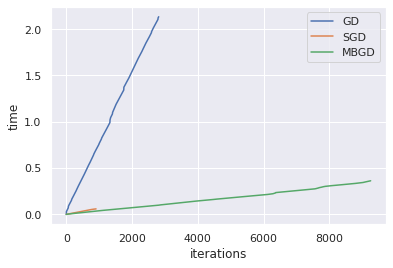

In [29]:
plt.plot(result_gd[1], result_gd[2], label = "GD")
plt.plot(result_sgd[1], result_sgd[2], label = "SGD")
plt.plot(result_mb[1], result_mb[2], label = "MBGD")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("time")
plt.show()

In [30]:
#Total time
print("library:", end_time_library)
print("GD:", result_gd[2][-1])
print("SGD:", result_sgd[2][-1])
print("MBGD:", result_mb[2][-1])

library: 0.03441572189331055
GD: 2.1341559886932373
SGD: 0.05965280532836914
MBGD: 0.3630836009979248


**COMPARE COSTFUNCTION**

Text(0.5, 1.0, 'GD')

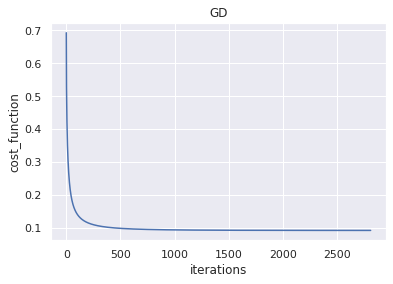

In [31]:
#cost function of GD
cost_function_list_gd = cost_function_list(x_train, y_train, result_gd[3])
plt.plot(result_gd[1],  cost_function_list_gd)
plt.xlabel("iterations")
plt.ylabel("cost_function")
plt.title("GD")

Text(0.5, 1.0, 'SGD')

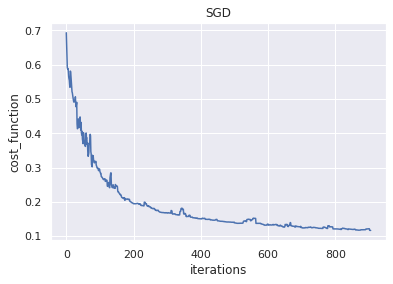

In [32]:
#cost function of SGD
cost_function_list_sgd = cost_function_list(x_train, y_train, result_sgd[3])
plt.plot(result_sgd[1],cost_function_list_sgd )
plt.xlabel("iterations")
plt.ylabel("cost_function")
plt.title("SGD")

Text(0.5, 1.0, 'MBGD')

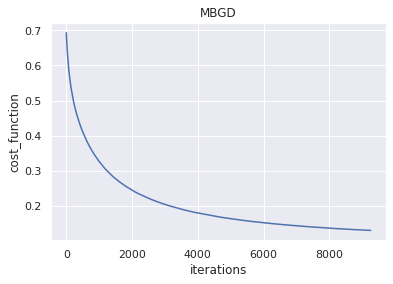

In [33]:
#cost function of MBGD
cost_function_list_mb = cost_function_list(x_train, y_train, result_mb[3])
plt.plot(result_mb[1], cost_function_list_mb)
plt.xlabel("iterations")
plt.ylabel("cost_function")
plt.title("MBGD")

In [34]:
#Cost_function compare
print("library:",  cost_function(y_train, model.predict_proba(x_train)[:,1]))
print("GD:", cost_function_list_gd[-1])
print("SGD:", cost_function_list_sgd[-1])
print("MBGD:", cost_function_list_mb[-1])

library: 0.09248249347330717
GD: 0.09195267979697536
SGD: 0.11659567334004063
MBGD: 0.13047200400867862


**COMPARE AUC**

In [35]:
print("library:", auc_library)
print("GD:", auc( y_test, y_prediction(x_test, w = result_gd[0])) )
print("SGD:", auc( y_test, y_prediction(x_test, w = result_sgd[0])) )
print("MBGD:", auc( y_test, y_prediction(x_test, w = result_mb[0])) )

library: 0.9756018592723195
GD: 0.9938644013463697
SGD: 0.9938066997916333
MBGD: 0.9939798044558422


**COMPARE ACCURAY**

In [36]:
print("library:", accuracy_score(y_test,label_predicted_library ))
print("GD:", accuracy_score( y_test, label_y(y_test,  y_prediction(x_test, w = result_gd[0])) ))
print("SGD:", accuracy_score( y_test, label_y(y_test,  y_prediction(x_test, w = result_sgd[0])) ))
print("MBGD:", accuracy_score( y_test, label_y(y_test,  y_prediction(x_test, w = result_mb[0])) ))

library: 0.976010101010101
GD: 0.9772727272727273
SGD: 0.976010101010101
MBGD: 0.976010101010101


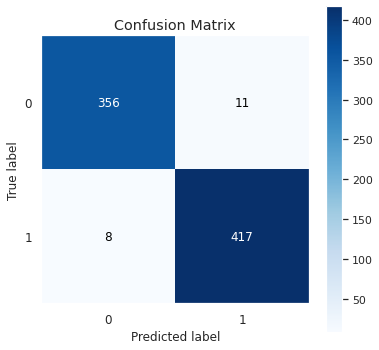

In [37]:
#LIBRARY
skplt.metrics.plot_confusion_matrix(y_test, label_predicted_library, figsize=(6,6))

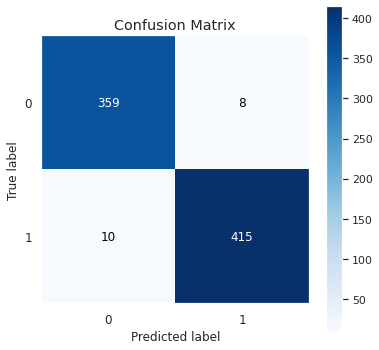

In [38]:
#GD
skplt.metrics.plot_confusion_matrix(y_test, label_y(y_test, y_prediction(x_test, w = result_gd[0])), figsize=(6,6))


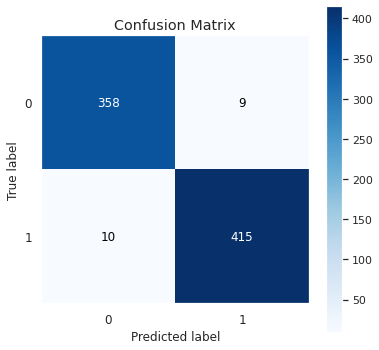

In [39]:
#SGD
skplt.metrics.plot_confusion_matrix(y_test, label_y(y_test, y_prediction(x_test, w = result_sgd[0])), figsize=(6,6))


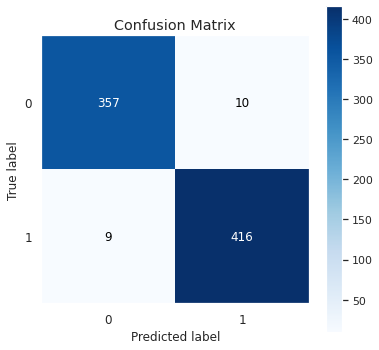

In [40]:
#MBGD
skplt.metrics.plot_confusion_matrix(y_test, label_y(y_test, y_prediction(x_test, w = result_mb[0])), figsize=(6,6))
